In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [358]:
df = pd.read_csv('analyze.csv')
df.head()

,Unnamed: 0,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date,rating
0,0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54,2
1,1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34,2
2,2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30,3
3,3,0005ab14-ea88-3038-b82c-86366713e96a,http://stevenredant.podomatic.com/rss2.xml,Steven Redant's Podcast,"Energy for your work out, your travels and you...",En example of what happened on my dance floor ...,En example of what happened on my dance floor ...,Steven Redant (the RedAnt),NaN,NaN,en-gb,0,https://assets.podomatic.net/ts/b8/34/09/steve...,Music,NaN,2016-11-26T18:37:07,2016-11-26T18:37:07,2
4,4,0005eac4-fa5d-3c33-a354-ad7928f3705b,http://api.spokenlayer.com/feed/channel/v1-wir...,WIRED News – Spoken Edition,NaN,Get in-depth coverage of current and future tr...,Get in-depth coverage of current and future tr...,WIRED,distribution@spokenlayer.com,http://www.spokenlayer.com,en,0,\n http://media.spokenlayer...,Technology,NaN,2016-11-27T06:46:08,2016-11-25T08:11:13,2


In [359]:
df_pod = df[['id','title', 'language', 'category', 'subcategory', 'rating']]
df_pod.shape

(32832, 6)

In [360]:
df_pod_test = df_pod[0:10000]

In [361]:
pod_rating = df_pod_test.pivot_table('rating', index = 'id', columns='title').fillna(0)

In [362]:
pod_rating.head()

title,"""2-Way""","""Backstage"" podcast from Word magazine","""Can You Take This Photo Please?"" with Justin Hamilton","""Diet and Fitness Podcasts by Diet.com""","""Doo Wop Today"" and Friends","""He's Just Not That Into You: Ten Chick Flick Cliches that are NOT in this movie""","""Stir It Up"" Comedy Podcast","""The Cari Murphy Show Straight Talk For The Soul""with Host Cari Murphy","""The Scarlet Letter"" Audiobook (Audio book)","""Watch It Burn""",...,영미 문학관,영어패턴 500 플러스 (네이티브가 평생 쓰는),오마이스쿨 온라인강좌,우물파는 게이머들의 리뷰,이정희 2014,정은임의 FM영화음악 팟캐스트,최진기의 뉴스위크,컬투쇼 레전드 사연 BEST 210,하나의 씨앗 교회 — 함께 듣기,하이 피델리티
id,,,,,,,,,,,,,,,,,,,,,
0002da5f-49a2-31ba-b44c-cdeabdf113cb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00044845-beb8-35f3-99e2-01dbcfb6eb63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00048bfa-8363-3f10-ac8e-8f27a31fe11f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005ab14-ea88-3038-b82c-86366713e96a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005eac4-fa5d-3c33-a354-ad7928f3705b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [363]:
pod_value = pod_rating.values.T
pod_value.shape


(9433, 9636)

In [364]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(pod_value)
matrix.shape

(9433, 12)

In [365]:
corr = np.corrcoef(matrix)
corr.shape

(9433, 9433)

In [366]:
corr2 = corr[:20, :20]
corr2.shape

(20, 20)

<AxesSubplot:>

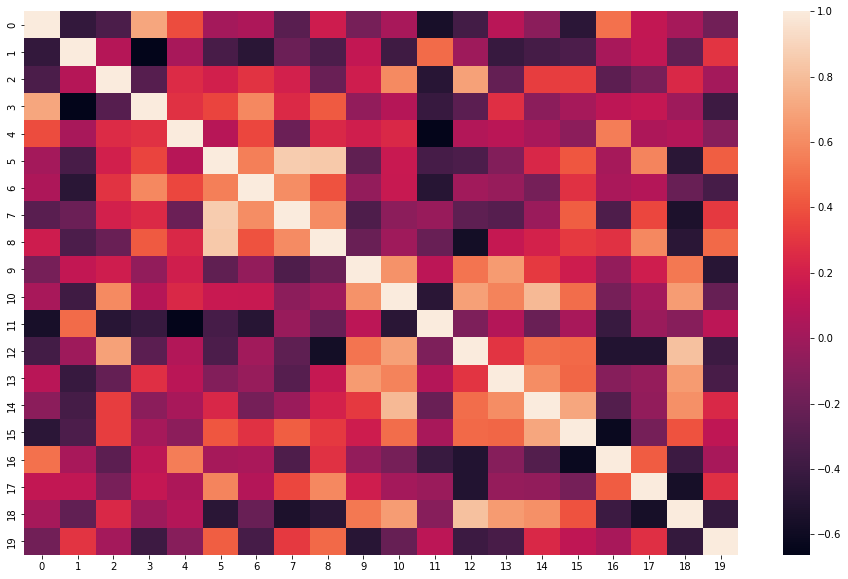

In [367]:

plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [368]:
title = pod_rating.columns
title_list = list(title)
coffey_hands = title_list.index("Youth Radio")


In [369]:
corr_coffey_hands  = corr[coffey_hands]
list(title[(corr_coffey_hands >= 0.85)])[:10]

['Audio Gumshoe',
 'Emperors of Rome',
 'Explain Things To Me',
 'Florida Glamour Photography',
 "Mallorca Lee's XL Podcast",
 'Mother Jones Podcast | Mother Jones',
 'PokerDiagram Poker Podcast',
 'Retro Rehab',
 'Salary Talk',
 'Tay and J Show']

In [619]:
df_pod_rate = df[['author', 'id','created_at', 'rating']]
df_pod_list1 = df[['id','title', 'language', 'category']]

In [620]:
df_pod_list1 = df_pod_list1[0:7000]
df_pod_rate = df_pod_rate[0:7000]

In [622]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
label = encoder.fit_transform(df_pod_rate['author'])
label1 = encoder.fit_transform(df_pod_list1['id'])
new = pd.DataFrame(label, columns = ['author'])
new1 = pd.DataFrame(label1, columns = ['id'])


In [623]:
df_pod_rate = df_pod_rate.drop(['author', 'id'], axis = 1)
df_pod_list_drop = df_pod_list1.drop(['id'], axis = 1)

In [624]:
df_pod_rating = pd.concat([new1, new, df_pod_rate], axis=1)
df_pod_list = pd.concat([new, df_pod_list_drop], axis=1)

In [625]:
df_pod_rating

,id,author,created_at,rating
0,0,688,2016-11-27T03:15:54,2
1,1,3958,2016-11-26T19:11:59,2
2,2,514,2016-11-27T00:37:30,3
3,3,4248,2016-11-26T18:37:07,2
4,4,4932,2016-11-27T06:46:08,2
...,...,...,...,...
6995,6995,1165,2016-11-27T01:05:58,4
6996,6996,1174,2016-11-26T21:08:57,5
6997,6997,3629,2016-11-27T01:48:36,3
6998,6998,4963,2016-11-26T23:31:43,5


In [626]:
df_pod_list

,author,title,language,category
0,688,Dispatches from CBC Radio,en-ca,News & Politics
1,3958,Motivation | Inspiration| Success with Entrepr...,en-us,Business
2,514,Disability411 Podcast,en-us,Government & Organizations
3,4248,Steven Redant's Podcast,en-gb,Music
4,4932,WIRED News – Spoken Edition,en,Technology
...,...,...,...,...
6995,1165,CanonWired,en-us,Religion & Spirituality/Christianity
6996,1174,Two Friends Watch,en,TV & Film
6997,3629,Prophecies Of The End Times,en,Religion & Spirituality
6998,4963,The Summoner,en-us,Games & Hobbies


In [627]:
df_pod_rating

,id,author,created_at,rating
0,0,688,2016-11-27T03:15:54,2
1,1,3958,2016-11-26T19:11:59,2
2,2,514,2016-11-27T00:37:30,3
3,3,4248,2016-11-26T18:37:07,2
4,4,4932,2016-11-27T06:46:08,2
...,...,...,...,...
6995,6995,1165,2016-11-27T01:05:58,4
6996,6996,1174,2016-11-26T21:08:57,5
6997,6997,3629,2016-11-27T01:48:36,3
6998,6998,4963,2016-11-26T23:31:43,5


In [628]:
pod_rating_matrix = df_pod_rating.pivot(
    index='id',
    columns='author',
    values='rating'
).fillna(0)

In [629]:
pod_rating_matrix.head()

author,0,1,2,3,4,5,6,7,8,9,...,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [630]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = pod_rating_matrix.values

# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)


In [631]:
matrix.shape

(7000, 5459)

In [632]:
user_ratings_mean.shape

(7000,)

In [633]:
matrix_user_mean.shape

(7000, 5459)

In [634]:
pd.DataFrame(matrix_user_mean, columns = pod_rating_matrix.columns).head()

author,0,1,2,3,4,5,6,7,8,9,...,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458
0,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,...,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366
1,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,...,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366
2,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,...,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550,-0.000550
3,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,...,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366
4,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,...,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366,-0.000366


In [635]:
# movie_user_rating = pod_value, user_movie_rating =pod_rating, 
# df_user_movie_ratings = pod_rating_matrix
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 12)

In [636]:
sigma = np.diag(sigma)

In [637]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [638]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = pod_rating_matrix.columns)

In [639]:
df_svd_preds.head()

author,0,1,2,3,4,5,6,7,8,9,...,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458
0,0.000021,0.000021,0.000021,-0.000007,0.000027,0.000027,0.000027,0.000011,0.000011,-0.000027,...,-0.000005,-0.000027,0.000027,-0.000015,0.000011,0.000021,-0.000005,0.000027,0.000027,-1.007547e-07
1,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,...,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,5.380852e-07
2,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,...,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,0.000551,3.237585e-07
3,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,...,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,5.380852e-07
4,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,...,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,0.000367,5.380852e-07


In [640]:
def recommend_movies(df_svd_preds, author_id, pod_df, pod_rate_df, num_recommendations=5):
    
    user_row_number = author_id - 1 
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    user_data = pod_rate_df[pod_rate_df.id == author_id] 
    user_history = user_data.merge(pod_df, on = 'author').sort_values(['rating'], ascending=False)
    
    recommendations = pod_df[~pod_df['author'].isin(user_history['author'])]
    
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on = 'author')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]        
    return user_history, recommendations

In [733]:
already_rated, predictions = recommend_movies(df_svd_preds, 3941, df_pod_list, df_pod_rating, 10)

In [734]:
already_rated = already_rated.drop(already_rated[already_rated['title'].str.contains('NaN', na=True)].index)
already_rated = already_rated.drop(already_rated[already_rated['category'].str.contains('NaN', na=True)].index)
already_rated

,id,author,created_at,rating,title,language,category
0,3941,4567,2016-11-27T04:40:40,4,The Readers,en-us,Arts/Literature


In [735]:
predictions = predictions.drop(predictions[predictions['title'].str.contains('NaN', na=True)].index)
predictions = predictions.drop(predictions[predictions['category'].str.contains('NaN', na=True)].index)
predictions


,author,title,language,category,Predictions
679,5007,WDR 2 Kritiker,de,Arts,0.000372
678,5007,WDR 2 Quintessenz,de,Business,0.000372
675,5007,WDR Lebenszeichen,de,Religion & Spirituality,0.000372
674,5007,Funkhaus Europa Radio Colonia,de,Society & Culture,0.000372
